# Robustness Analyses in Boolean Regulatory Networks

    [ ] Introduction
        [ ] Biology and robustness.
        [ ] Boolean networks
        [ ] Previous pipelines
    [ ] Methods
    [ ] Results
        [ ] Labels
            [ ] Markers
            [ ] PCA and machine learning
        [ ] Topology
            [ ] griffin
        [ ] Functions
            [ ] KOver
            [ ] Inputs
            [ ] Truth table
        [ ] Transition space
            [ ] Basins
            [ ] Update
            [ ] Reverse network naldi
            [ ] Transitions boolnet and griffin
        [ ] States and attractors
            [ ] Trajectory
            [ ] Attractors
    [ ] Conclusions



## Introduction

    [ ] Biology and robustness.
    [ ] Boolean networks
    [ ] Previous pipelines


## Methods

## Results

    [ ] Labels
         [ ] Markers
         [ ] PCA and machine learning
    [ ] Topology
         [ ] griffin
    [ ] Functions
         [ ] KOver
         [ ] Inputs
         [ ] Truth table
    [ ] Transition space
         [ ] Update
         [ ] Reverse network naldi
         [ ] Transitions boolnet and griffin
    [ ] States and attractors
         [ ] Trajectory
         [ ] Attractors



In [4]:
library('plyr')
library('ggplot2')
library('BoolNet')

library(repr)
options(repr.plot.width=4, repr.plot.height=3)

In [5]:
#library('BoolNetPerturb')
source('code/BNP_Helper.R')
source('code/BNP_Dataframe.R')
source('code/BNP_Topology.R')
source('code/BNP_Label.R')
source('code/BNP_Perturbations.R')

## Load data

In [6]:
netA <- loadNetwork('references/Th1Th2.csv')
netB <- loadNetwork('references/Th2Treg.csv')
netC <- loadNetwork('references/TregTh17.csv')

#toSBML(netA, 'references/Th1Th2.sbml')
#toSBML(netB, 'references/Th2Treg.sbml')
#toSBML(netC, 'references/TregTh17.sbml')

nets.names <- c("netA", "netB", "netC")
nets = list(netA, netB, netC)

In [7]:
rulesA <- data.frame( labels = c('Th0','Th1','Th2','TBET+','GATA3+'),
        rules = c('!(GATA3 | TBET)', 'TBET & IFNG', 'GATA3 & IL4', 'TBET & !IFNG', 'GATA3 & !IL4')   )
rulesB <- data.frame( labels = c('Th0','Th2','GATA3+','Treg', 'FOXP3+', 'Th3'),
        rules = c('!(GATA3 | FOXP3 | TGFB)', 'GATA3 & IL4', 'GATA3 & !IL4', 
                  'FOXP3 & TGFB', 'FOXP3 & !TGFB', 'TGFB & !(FOXP3 | GATA3)')   )
rulesC <- data.frame( labels = c('Th0','Th17','RORGT+','Treg', 'FOXP3+','Th3'),
        rules = c('!(RORGT | FOXP3 | TGFB)', 'RORGT & IL21', 'RORGT & !IL21', 
                  'FOXP3 & TGFB', 'FOXP3 & !TGFB', 'TGFB & !(FOXP3 | RORGT)')   )

label.rules <- list(rulesA,rulesB,rulesC)

In [8]:
envA <- list(
        env=list('WT','pro-Th0','pro-Th1','pro-Th2'),
        nodes=list(c(),c('IFNGe','IL2e','IL4e'),c('IFNGe','IL2e','IL4e'),c('IFNGe','IL2e','IL4e')),
        value=list(c(0),c(0,0,0),c(1,1,0),c(0,1,1))
        )
envB <- list(
        env=list('WT','pro-Th0','pro-Treg','pro-Th2'),
        nodes=list(c(),c('TGFBe','IL2e','IL4e'),c('TGFBe','IL2e','IL4e'),c('TGFBe','IL2e','IL4e')),
        value=list(c(0),c(0,0,0),c(1,1,0),c(0,1,1))
        )
envC <- list(
        env=list('WT','pro-Th0','pro-Treg','pro-Th17'),
        nodes=list(c(),c('TGFBe','IL2e','IL21e'),c('TGFBe','IL2e','IL21e'),c('TGFBe','IL2e','IL21e')),
        value=list(c(0),c(0,0,0),c(1,1,0),c(1,0,1))
        )
envs <- list(envA, envB, envC)

## Topology

In [9]:
getNetTopology(netC)

Source,Target,Interaction
FOXP3,FOXP3,+
TGFB,FOXP3,+
IL2,FOXP3,+
IL21,FOXP3,-
RORGT,FOXP3,-
FOXP3,TGFB,+
TGFB,TGFB,+
IL21,TGFB,-
TGFBe,TGFB,+
FOXP3,IL2,-


In [10]:
nets.topo <- lapply(nets, getNetTopology)
lapply(nets.topo, function(x) table(x$Interaction) )

[[1]]

 -  + NA 
 9 16  1 

[[2]]

 -  + NA 
 3 17  1 

[[3]]

 -  + 
 7 16 


## Labels

In [11]:
attrC <- getAttractors(netC)
attrC.df <- attractor2dataframe(attrC, Boolean = TRUE)
attrC.df["label"] <- labelAttractors(attrC, rulesC, sep=NULL)
attrC.df

attractor,state,FOXP3,TGFB,IL2,IL21,RORGT,TGFBe,IL2e,IL21e,label
1,1,0,0,0,0,0,0,0,0,Th0
2,1,0,1,0,0,0,0,0,0,Th3
3,1,0,0,1,0,0,0,0,0,Th0
4,1,0,0,0,1,0,0,0,0,Th0
5,1,0,1,0,0,0,1,0,0,Th3
6,1,0,1,0,1,1,1,0,0,Th17
7,1,0,0,1,0,0,0,1,0,Th0
8,1,1,1,1,0,0,0,1,0,Treg
9,1,0,0,0,1,0,0,1,0,Th0
10,1,1,1,1,0,0,1,1,0,Treg


In [12]:
nets.attr <- lapply(nets, getAttractors)
lapply(nets.attr, function(x) length(x$attractors) )

[[1]]
[1] 26

[[2]]
[1] 20

[[3]]
[1] 22

In [13]:
nets.attr.label <- mapply(function(x,y) {  labelAttractors(x,y)  }, 
                          x=nets.attr, y=label.rules)
lapply(nets.attr.label, table )

[[1]]

 GATA3+     Th0 Th0/Th0     Th1     Th2 
      1       3       2       8      12 

[[2]]

GATA3+    Th0    Th2    Th3   Treg 
     1      3      6      8      2 

[[3]]

       Th0    Th0/Th0       Th17        Th3 Th3/RORGT+       Treg 
         9          1          4          2          2          4 


### Functions

     [ ] KOver
     [ ] Inputs
     [ ] Truth table

In [14]:
netC.mut <- perturbNetworkFixedNodes(netC, label.rules=rulesC)
rbind(
    netC.mut,
    countChangesDataframe(netC.mut, axis=2)
)

,WT,FOXP3_0,TGFB_0,IL2_0,IL21_0,RORGT_0,TGFBe_0,IL2e_0,IL21e_0,FOXP3_1,TGFB_1,IL2_1,IL21_1,RORGT_1,TGFBe_1,IL2e_1,IL21e_1
FOXP3+,0,0,4,0,0,0,0,0,0,4,0,0,0,0,0,0,0
FOXP3+/Treg,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
RORGT+,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0
RORGT+/Th17,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0
Th0,9,9,18,6,6,9,9,5,5,0,0,4,4,0,0,4,4
Th0/Th0,1,1,2,0,0,1,1,0,0,0,0,0,0,0,0,1,1
Th17,4,4,0,4,0,0,0,2,2,0,8,0,4,8,4,2,2
Th3,2,10,0,4,4,6,1,2,2,0,2,0,0,0,1,0,0
Th3/RORGT+,2,2,0,0,0,0,0,0,1,0,4,0,0,0,2,2,1
Th3/Th3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


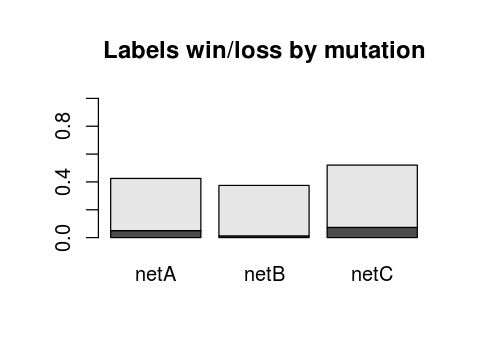

In [15]:
nets.mut.label <- mapply(function(x,y) {  
    perturbNetworkFixedNodes(x,label.rules=y)  },
    x=nets, y=label.rules,
    SIMPLIFY = F)

# Normalize and save average, only counts labels
nets.mut.avg <- lapply(nets.mut.label, function(n) {
    res <- countChangesDataframe(n, axis=2)
    res <- data.frame(res)
    res['WT'] <- NULL
    res <- res/sum(n$WT!=0)
    rowMeans(res)
})
nets.mut.avg <- data.frame(nets.mut.avg)
colnames(nets.mut.avg) = nets.names
barplot(as.matrix(nets.mut.avg),
        main="Labels win/loss by mutation",
        ylim=c(0,1), beside=F)

In [13]:
perturbNetworkFixedNodes(netC,
                         genes=envC$nodes,
                         values=envC$value,
                         names=envC$env,
                         label.rules=rulesC)

,WT,pro-Th0,pro-Treg,pro-Th17
Th0,9,3,0,0
Th0/Th0,1,0,0,0
Th17,4,0,1,1
Th3,2,1,0,0
Th3/RORGT+,2,0,1,0
Treg,4,0,1,0


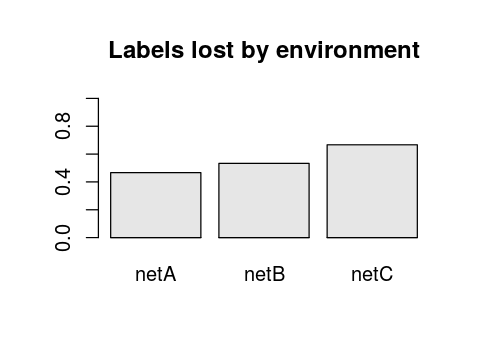

In [14]:
nets.env.label <- mapply(function(x,y,z) {  perturbNetworkFixedNodes(x,
                              y$nodes,y$value,y$env,
                              label.rules=z)  },
                            x=nets, y=envs, z=label.rules,
                            SIMPLIFY = F)

# Normalize and save average, only counts labels
nets.env.avg <- lapply(nets.env.label, function(n) {
    res <- countChangesDataframe(n, axis=2)
    res <- data.frame(res)
    res['WT'] <- NULL
    res <- res/sum(n$WT!=0)
    rowMeans(res)
})
nets.env.avg <- data.frame(nets.env.avg)
colnames(nets.env.avg) = nets.names
barplot(as.matrix(nets.env.avg),
        main="Labels lost by environment",
        ylim=c(0,1), beside=F)

In [15]:
repetitions <- 10

table2df <- function(x, cols=c("WT")){
    x <- data.frame(x)
    rownames(x) <- x[[1]]
    x[[1]] <- NULL
    colnames(x) <- cols
    x
}

netC.func <- table(labelAttractors(attrC, label.rules=rulesC))
netC.func <- table2df(netC.func)

for (i in seq(repetitions)) {
    n <- getAttractors(perturbNetwork(netC))
    n <- labelAttractors(n, label.rules=rulesC)
    n <- table2df(table(n), i)
    netC.func <- merge(netC.func, n, by=0, all=TRUE)
    rownames(netC.func) <- netC.func$Row.names
    netC.func$Row.names <- NULL
}
netC.func <- rbind(netC.func,
                   countChangesDataframe(netC.func, axis=2))
netC.func

,WT,1,2,3,4,5,6,7,8,9,10
Th0,9,9,NA,5,9,9,7,9,7,4,5
Th0/Th0,1,1,NA,NA,1,1,1,1,1,1,NA
Th0/Th0/Th0,NA,NA,NA,NA,NA,NA,NA,NA,1,NA,NA
Th17,4,4,4,2,NA,4,4,4,2,2,4
Th3,2,2,1,2,6,2,2,2,2,NA,2
Th3/RORGT+,2,2,2,NA,NA,1,3,2,2,1,2
Th3/Th17,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,4
Th3/Th17/RORGT+,NA,NA,NA,NA,NA,NA,NA,NA,2,NA,NA
Th3/Th3,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,NA
Th3/Th3/RORGT+/Th0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1


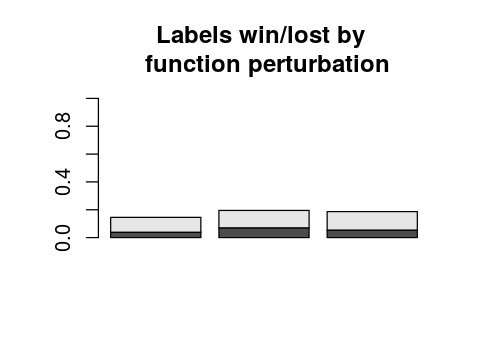

In [16]:
repetitions <- 1000

nets.func.avg <- mapply(function(x,y) {  
        attr <- getAttractors(x)
        df <- table(labelAttractors(attr, label.rules=y))
        df <- table2df(df)
        for (i in seq(repetitions)) {
            n <- getAttractors(perturbNetwork(x))
            n <- labelAttractors(n, label.rules=y)
            n <- table2df(table(n), i)
            df <- merge(df, n, by=0, all=TRUE)
            rownames(df) <- df$Row.names
            df$Row.names <- NULL
        }
        r <- countChangesDataframe(df, axis=2)
        r <- rowSums(r)/repetitions #normilize by rep
        r <- r/sum(df$WT!=0, na.rm=T) #normilize by labels
    },x=nets, y=label.rules,SIMPLIFY = T)


barplot(as.matrix(nets.func.avg),
        main="Labels win/lost by \n function perturbation",
        ylim=c(0,1), beside=F)

### Transition space
     [ ] Basins
     [ ] Update
     [ ] Reverse network naldi
     [ ] Transitions boolnet and griffin

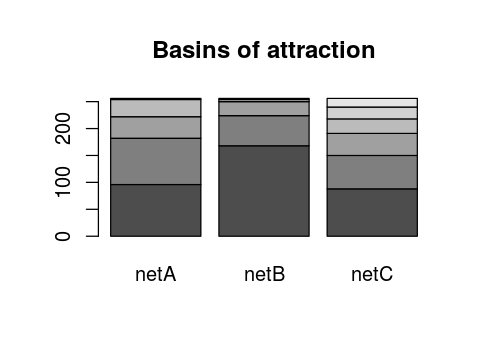

In [17]:
nets.attr.basin <- mapply(function(x,y) {
    attr <- getAttractors(x)
    df <- attractors2dataframe(list(attr),returnDataFrame='basinSize')
    df <- aggregateByLabel(df, x$genes, y)
    df[order(df[1], decreasing = TRUE),]
    },x=nets, y=label.rules)


nets.attr.basin <- lapply(nets.attr.basin, `length<-`, max(lengths(nets.attr.basin)))
nets.attr.basin <- data.frame(nets.attr.basin)
colnames(nets.attr.basin) = nets.names
barplot(as.matrix(data.frame(nets.attr.basin)),
        main="Basins of attraction",
        beside=F)

In [18]:
source("code/BNP_Perturbations.R")

In [19]:
#verifyAttractorSyncronousVsAsyncronous(netC)
verifySyncronousVsAsyncronous(netC, label.rules=rulesC)

,sync.Freq,async.Freq
Th0,9,9
Th0/Th0,1,NA
Th17,4,4
Th3,2,2
Th3/RORGT+,2,NA
Treg,4,4
Total,22,19


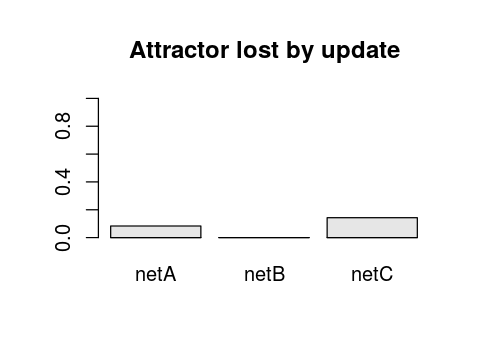

In [20]:
nets.update.label <- mapply(function(x,y) {verifySyncronousVsAsyncronous(x,label.rules=y)},
                            x=nets, y=label.rules,
                            SIMPLIFY = F)

# Normalize and save average, only counts labels
nets.update.avg <- lapply(nets.update.label, function(n) {
    res <- countChangesDataframe(n, reference="sync.Freq", axis=2)
    res <- data.frame(res)
    res <- res/sum(n$sync.Freq!=0)
    rowMeans(res)
})
nets.update.avg <- data.frame(nets.update.avg)
colnames(nets.update.avg) = nets.names
barplot(as.matrix(nets.update.avg),
        main="Attractor lost by update",
        ylim=c(0,1), beside=F)

### States and attractors
    [ ] Trajectory
    [ ] Attractors

In [21]:
#source('code/BNP_Helper.R')
#source('code/BNP_Dataframe.R')
#source('code/BNP_Topology.R')
#source('code/BNP_Label.R')
source('code/BNP_Perturbations.R')

In [22]:
perturbState(netC, result="trajectory")

,FOXP3,TGFB,IL2,IL21,RORGT,TGFBe,IL2e,IL21e
1,1,1,0,0,1,0,1,1
2,0,1,0,0,1,0,1,1
3,0,1,1,1,0,0,1,1
4,0,0,0,0,1,0,1,1
5,0,0,1,1,0,0,1,1
6,0,0,0,0,0,0,1,1


In [23]:
netC.Fate.Map <- cellFateMap(netC, label.rules=rulesC)
head(netC.Fate.Map)

initial,final,genes,values
Th0,Treg,FOXP3,1
Th0,Treg,TGFB,1
Th0,Th0,IL2,0
Th0,Th0,IL21,1
Th0,Th0,RORGT,1
Th0,Treg,TGFBe,1


In [24]:
# using plyr::count

netC.transitions <- count(subset(netC.Fate.Map,initial!=final), c("initial", "final"))
netC.transitions <- netC.transitions[order(netC.transitions$freq,decreasing=T),]

sum(netC.transitions["freq"])/dim(netC.Fate.Map)[1]
netC.transitions

[1] 0.375

,initial,final,freq
4,Th0,Th0/Th0,10
11,Th3,Th3/RORGT+,10
2,RORGT+,Th3/RORGT+,7
5,Th0,Th3,6
6,Th0,Treg,6
3,RORGT+,Treg,5
10,Th3,Th17,5
1,RORGT+,Th17,4
8,Th17,Treg,4
9,Th3,Th0,4


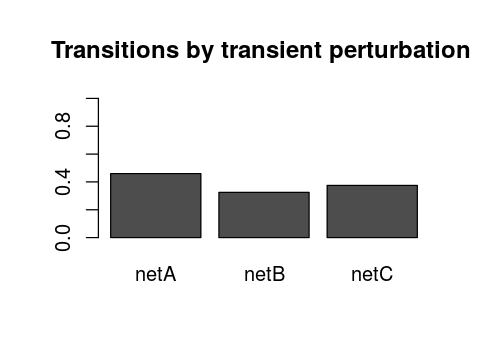

In [25]:
nets.transitions <- mapply(function(x,y) {
    df <- cellFateMap(x,label.rules=y)
    diff <- count(subset(df,initial!=final), c("initial", "final"))
    sum(diff["freq"])/dim(df)[1]
    },
    x=nets, y=label.rules,SIMPLIFY = F)

nets.transitions <- data.frame(nets.transitions)
colnames(nets.transitions) = nets.names
barplot(as.matrix(nets.transitions),
        main="Transitions by transient perturbation ",
        ylim=c(0,1), beside=F)